# Creating an ANN to predict Diabetes

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


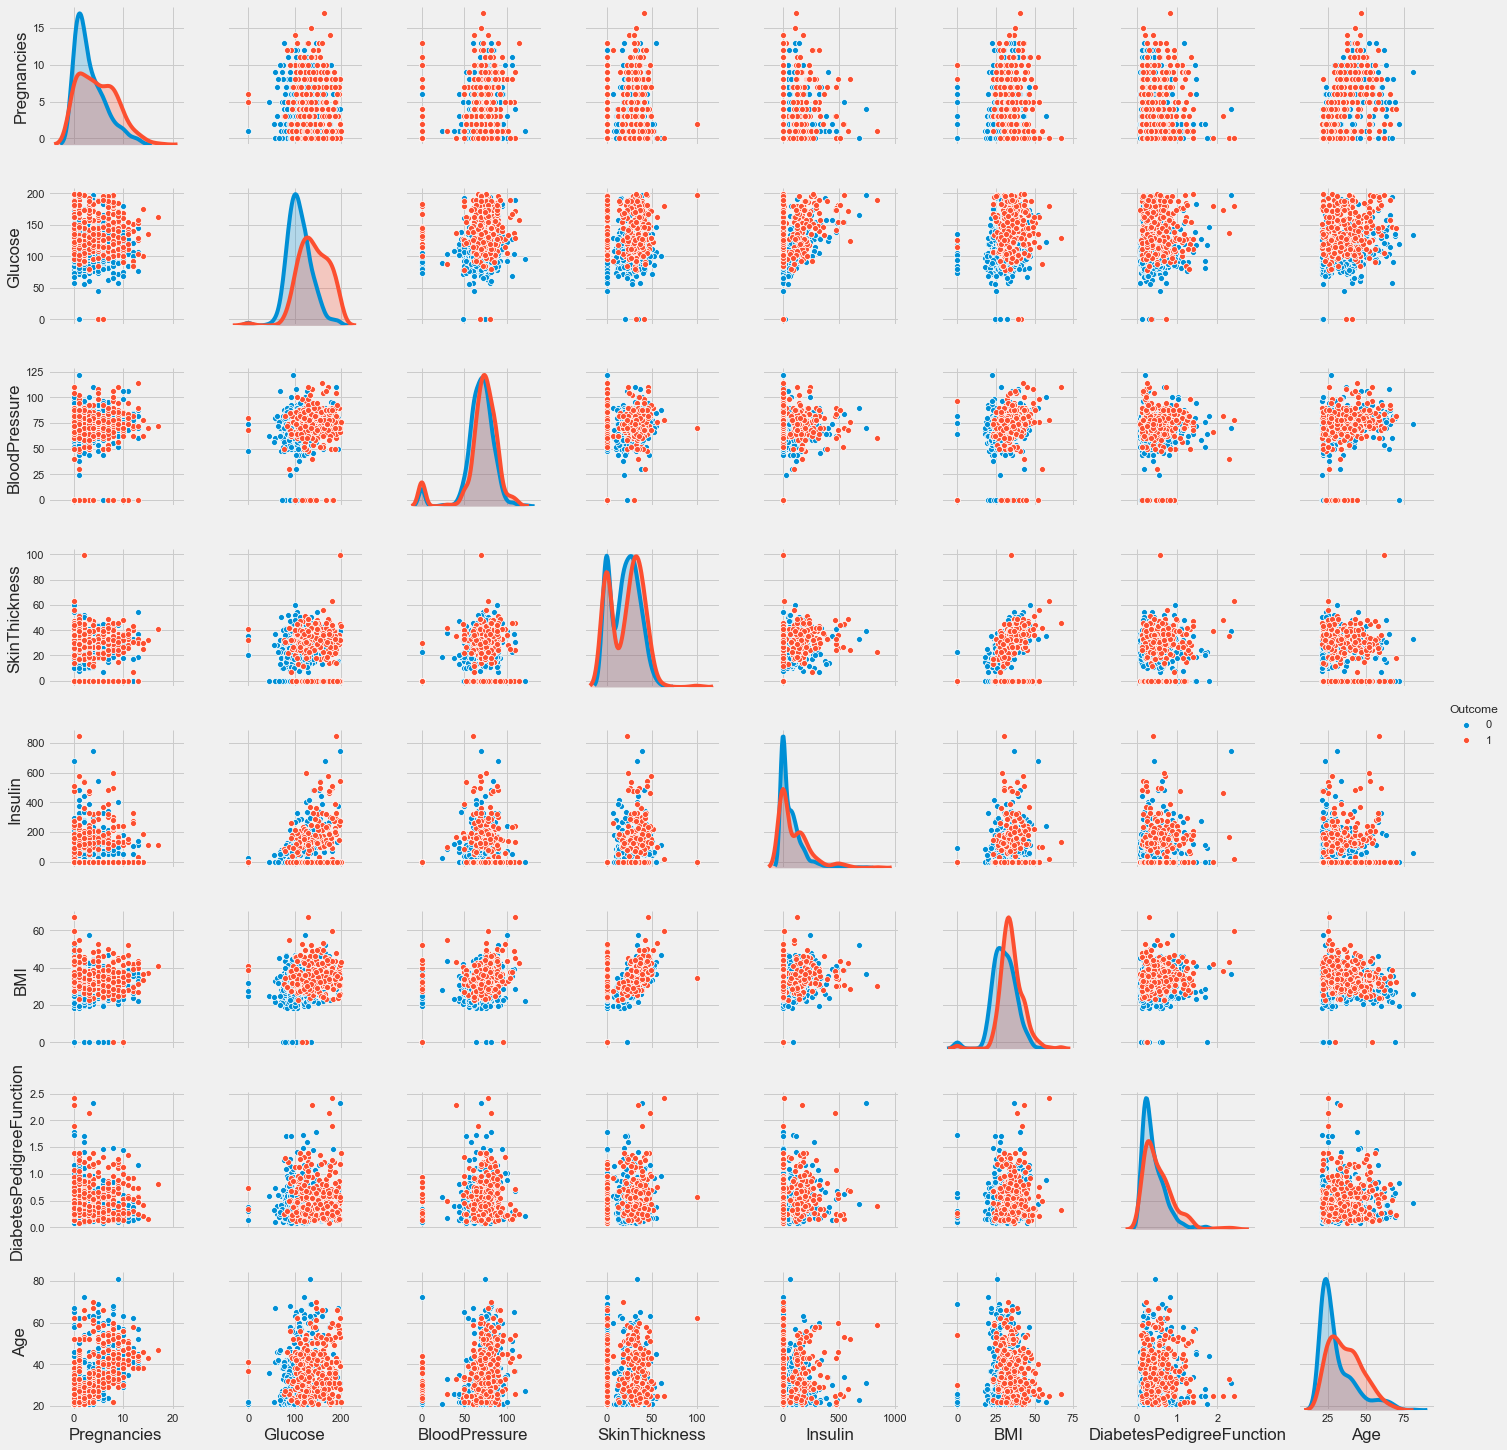

In [3]:
sns.pairplot(df, hue = 'Outcome')

In [4]:
## Creating numpy arrays for model ##
X = df.drop('Outcome', axis = 1).values
y = df['Outcome']

In [5]:
## Splitting the data ##
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
# Importing all the libraries from PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
##### Creating Tensors ######
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [8]:
df.shape

(768, 9)

In [9]:
##### Creating model with PyTorch #####
class ANN_Model(nn.Module):
    def __init__(self, input_features = 8, hidden1 = 20, hidden2 = 20, out_features = 2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [10]:
### Instantiate my ANN_Model
torch.manual_seed(20)
model = ANN_Model()

In [11]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [12]:
### Define the backward Propagation 
## -- Define the loss function 
## -- Define the optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [13]:
epochs = 500
final_losses = []
for i in range(epochs):
    i = i+1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    
    if i % 10 == 1:
        print("Epoch number: {} and the loss: {}".format(i, loss.item()))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss: 3.457212209701538
Epoch number: 11 and the loss: 0.8019211888313293
Epoch number: 21 and the loss: 0.6090323328971863
Epoch number: 31 and the loss: 0.5917772054672241
Epoch number: 41 and the loss: 0.5679707527160645
Epoch number: 51 and the loss: 0.5529041290283203
Epoch number: 61 and the loss: 0.5410096049308777
Epoch number: 71 and the loss: 0.5310389995574951
Epoch number: 81 and the loss: 0.522036075592041
Epoch number: 91 and the loss: 0.5135971307754517
Epoch number: 101 and the loss: 0.5061255693435669
Epoch number: 111 and the loss: 0.4983412027359009
Epoch number: 121 and the loss: 0.4960547685623169
Epoch number: 131 and the loss: 0.48286372423171997
Epoch number: 141 and the loss: 0.47560378909111023
Epoch number: 151 and the loss: 0.47992369532585144
Epoch number: 161 and the loss: 0.4792938232421875
Epoch number: 171 and the loss: 0.4649999141693115
Epoch number: 181 and the loss: 0.458202600479126
Epoch number: 191 and the loss: 0.45270860

Text(0.5, 0, 'Epoch')

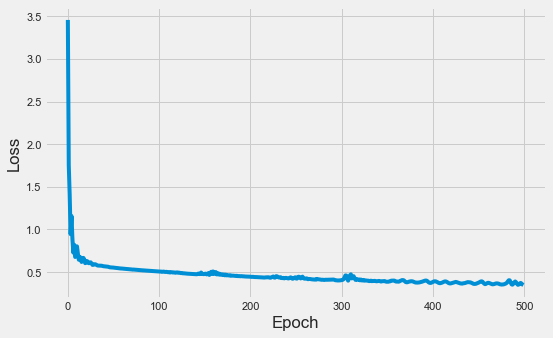

In [14]:
## Plotting the loss function
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [18]:
### Prediction in X_test Data
predictions = []
# No gradient with the function torch.no_grad, not needed in testing
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
print(predictions)

[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[93, 14],
       [18, 29]], dtype=int64)

Text(40.1, 0.5, 'Predicted Value')

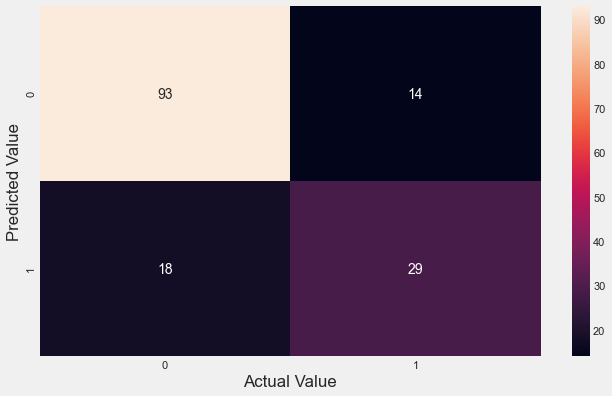

In [23]:
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

In [24]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.7922077922077922

In [25]:
##### Save the model #####
torch.save(model, 'diabetes.pt')

In [26]:
# Loading the model
model = torch.load('diabetes.pt')

In [27]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)